In [5]:
from sympy import *
from fractions import Fraction
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import hypergeom
from scipy.stats import nbinom
from scipy.stats import expon
from scipy.stats import norm
from IPython.display import display, Latex, HTML, Math
import statsmodels.api as sm
from scipy import stats
import numpy as np
import sympy as sp
import math as math
from matplotlib import pyplot as plt
from sympy.abc import t
from IPython.display import display, Math, Latex
import numpy as np
%matplotlib inline
x, y, z, t, u, c, v = symbols('x y z t u c v')
sp.init_printing() 
from sympy import Rational as R

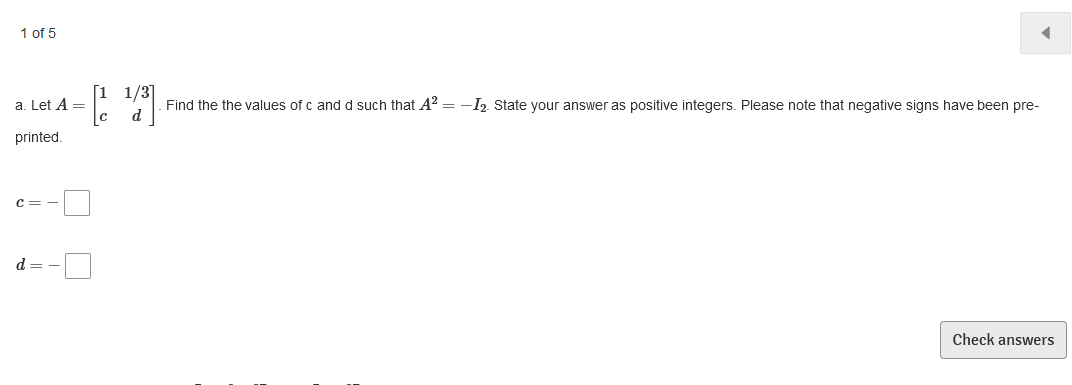

In [8]:
c, d = symbols('c d')
A = Matrix([[1, R(1,3)], [c, d]])
X = A**2 + eye(2)
solve((X[0,0]+X[0,1], X[1,0]+X[1,1]), (c,d))

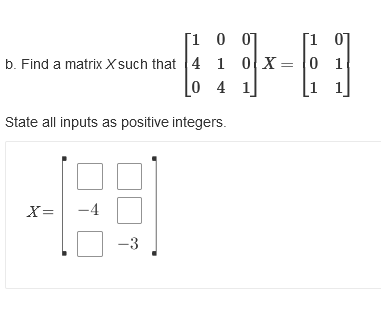

In [10]:
A = Matrix([[1,0,0], [4,1,0], [0,4,1]])
B = Matrix([[1,0], [0,1], [1,1]])
X = A**-1 * B
X

⎡1   0 ⎤
⎢      ⎥
⎢-4  1 ⎥
⎢      ⎥
⎣17  -3⎦

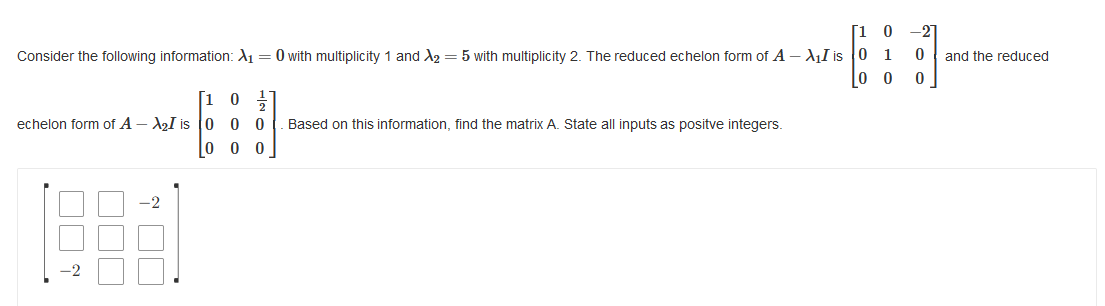

In [12]:
A0 = Matrix([[1,0,-2],[0,1,0],[0,0,0]])
A5 = Matrix([[1,0,(1)/(2)],[0,0,0],[0,0,0]])
v1 = A0.nullspace()[0]
v2 = A5.nullspace()[0]
v3 = A5.nullspace()[1]
P = Matrix.hstack(v1, v2, v3)
D = diag(0,5,5)
Pinv = P**-1
A = P*D*Pinv
A

⎡1.0   0  -2.0⎤
⎢             ⎥
⎢ 0    5   0  ⎥
⎢             ⎥
⎣-2.0  0  4.0 ⎦

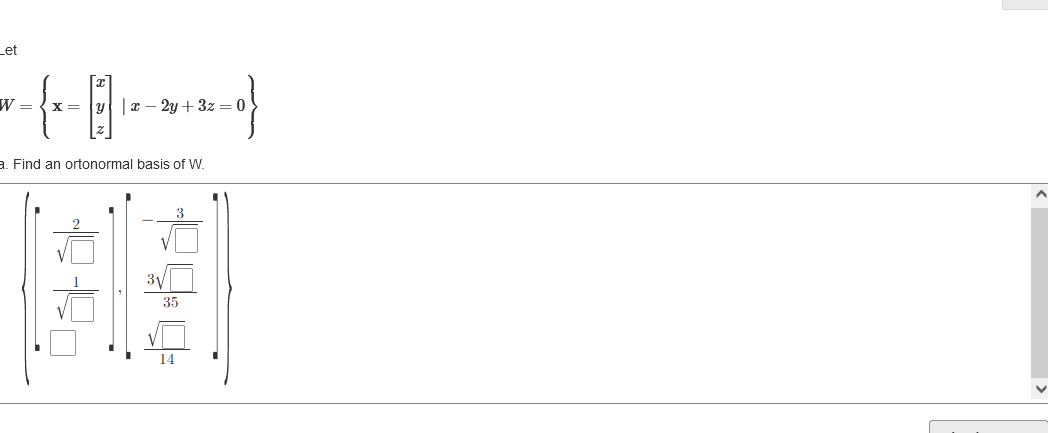

In [13]:
# a)
A = Matrix([1, -2, 3]).T
v1 = A.nullspace()[0]
v2 = A.nullspace()[1]

# Make them orthonormal
u1 = GramSchmidt([v1, v2], True)[0]
u2 = GramSchmidt([v1, v2], True)[1]

u1, u2

⎛        ⎡-3⋅√70 ⎤⎞
⎜⎡2⋅√5⎤  ⎢───────⎥⎟
⎜⎢────⎥  ⎢   70  ⎥⎟
⎜⎢ 5  ⎥  ⎢       ⎥⎟
⎜⎢    ⎥  ⎢ 3⋅√70 ⎥⎟
⎜⎢ √5 ⎥, ⎢ ───── ⎥⎟
⎜⎢ ── ⎥  ⎢   35  ⎥⎟
⎜⎢ 5  ⎥  ⎢       ⎥⎟
⎜⎢    ⎥  ⎢  √70  ⎥⎟
⎜⎣ 0  ⎦  ⎢  ───  ⎥⎟
⎝        ⎣   14  ⎦⎠

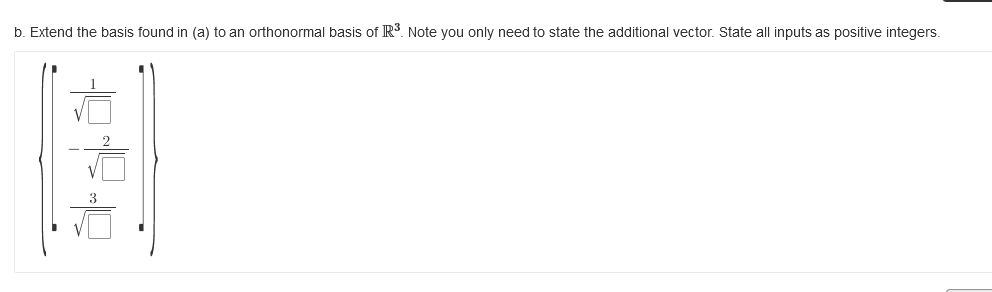

In [14]:
# b)
Matrix.vstack(u1.T, u2.T).nullspace()[0].normalized()

⎡ √14 ⎤
⎢ ─── ⎥
⎢  14 ⎥
⎢     ⎥
⎢-√14 ⎥
⎢─────⎥
⎢  7  ⎥
⎢     ⎥
⎢3⋅√14⎥
⎢─────⎥
⎣  14 ⎦

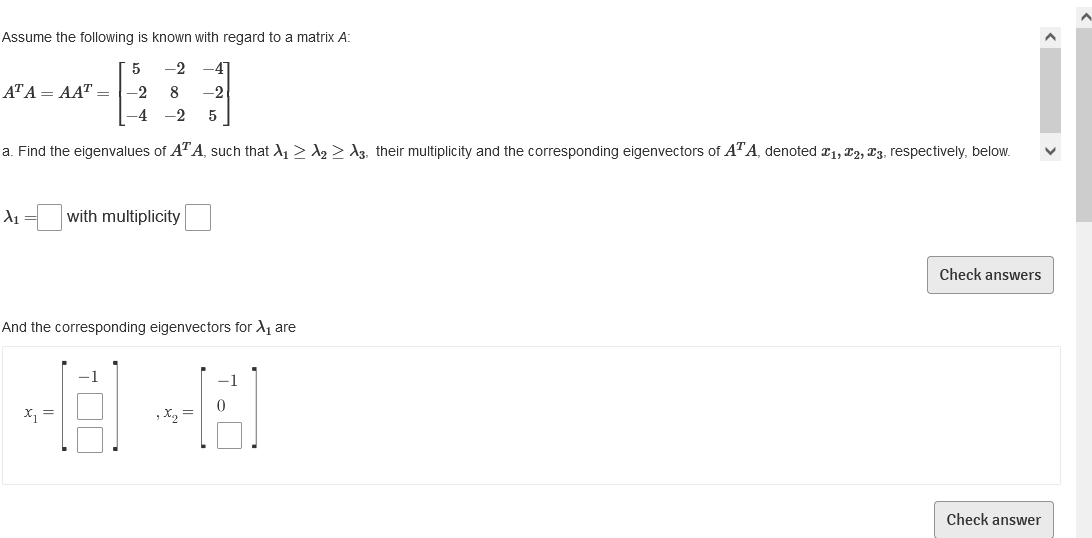

In [18]:
AAt = Matrix([[5,-2,-4],[-2,8,-2],[-4,-2,5]])
AtA = Matrix([[5,-2,-4],[-2,8,-2],[-4,-2,5]])
AAt, AtA

⎛⎡5   -2  -4⎤  ⎡5   -2  -4⎤⎞
⎜⎢          ⎥  ⎢          ⎥⎟
⎜⎢-2  8   -2⎥, ⎢-2  8   -2⎥⎟
⎜⎢          ⎥  ⎢          ⎥⎟
⎝⎣-4  -2  5 ⎦  ⎣-4  -2  5 ⎦⎠

In [20]:
# a)
vecs = AtA.eigenvects()
vecs


⎡⎛      ⎡⎡ 1 ⎤⎤⎞  ⎛      ⎡⎡-1/2⎤  ⎡-1⎤⎤⎞⎤
⎢⎜      ⎢⎢   ⎥⎥⎟  ⎜      ⎢⎢    ⎥  ⎢  ⎥⎥⎟⎥
⎢⎜0, 1, ⎢⎢1/2⎥⎥⎟, ⎜9, 2, ⎢⎢ 1  ⎥, ⎢0 ⎥⎥⎟⎥
⎢⎜      ⎢⎢   ⎥⎥⎟  ⎜      ⎢⎢    ⎥  ⎢  ⎥⎥⎟⎥
⎣⎝      ⎣⎣ 1 ⎦⎦⎠  ⎝      ⎣⎣ 0  ⎦  ⎣1 ⎦⎦⎠⎦

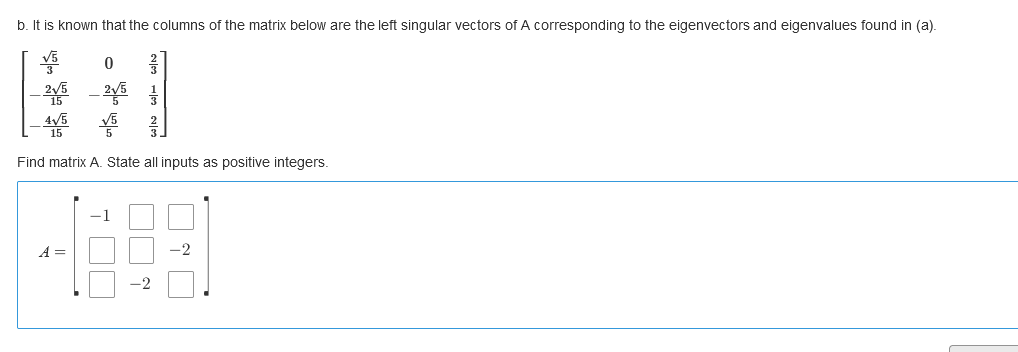

In [21]:
# b) First find values for SVD. The given matrix is U so we need to find V
s1 = sqrt(vecs[1][0])
s2 = sqrt(vecs[1][0])
s3 = sqrt(vecs[0][0])
v1 = GramSchmidt([vecs[1][2][0], vecs[1][2][1]], True)[0]
v2 = GramSchmidt([vecs[1][2][0], vecs[1][2][1]], True)[1]
v3 = vecs[0][2][0].normalized()

# So V is
V = Matrix.hstack(v1, v2, v3)
Vt = V.T

# We get U from the assignment
U = Matrix([[(sqrt(5))/(3),0,(2)/(3)],
            [-(2*sqrt(5))/(15),-(2*sqrt(5))/(5),(1)/(3)],
            [-(4*sqrt(5))/(15),(sqrt(5))/(5),(2)/(3)]])

# We need Sigma
S = diag(s1, s2, s3)

# We find A
display(Latex("$$A = {}{}{}$$".format(latex(U), latex(S), latex(Vt))))
A = U*S*Vt
A

<IPython.core.display.Latex object>

⎡-1  2   0 ⎤
⎢          ⎥
⎢2   0   -2⎥
⎢          ⎥
⎣0   -2  1 ⎦

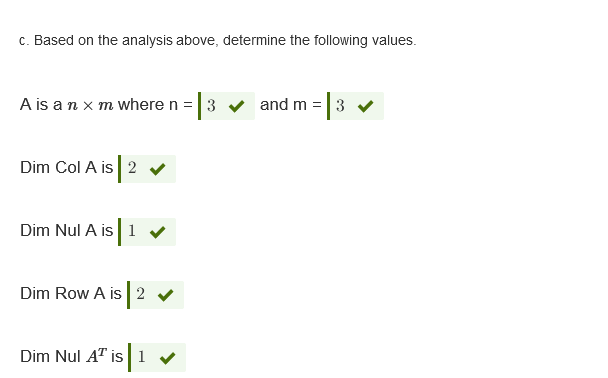

In [ ]:
# C)

# we get n and m from size of U and V so n = 3, m = 3
# Col A = Rank. 2 nonzero singular values, so Dim Col A = 2
# Dim Nul A = n - Dim Col A = 1
# Dim Row = Rank A = 2
# Dim Nul A.T = n - Rank A = 1

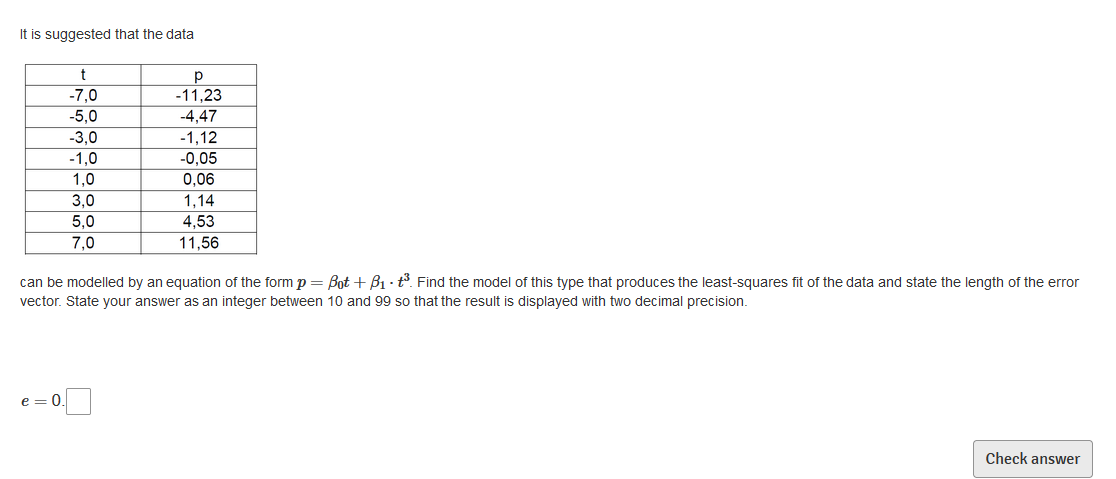

In [ ]:
# Data
x = np.array([-7.0, -5.0, -3.0, -1.0, 1.0, 3.0, 5.0, 7.0])
y = np.array([-11.23, -4.47, -1.12, -0.05, 0.06, 1.14, 4.53, 11.56])

# Design matrices for the three models
 # Model 1: β0 + β1*t³
X1 = Matrix(x).row_join(Matrix(x**3))

display(Math(r'X_1 = ' + latex(X1)))


# Model 1: y1(t) = β0 + β1*t³
X1tX1 = X1.T*X1
X1ty = X1.T*Matrix(y)
Mat, _ = X1tX1.row_join(X1ty).rref()
B1 = Mat[:,-1]
display(Latex("$$y_1(t) = {} + {}t^3$$".format(round(B1[0],4), round(B1[1], 4))))

display(Math(r'X_1^TX_1 = ' + latex(X1tX1)))
display(Math(r'X_1^Ty = ' + latex(X1ty)))

display(Latex("$$y_1(t) = {}+{}t^3$$".format(round(B1[0],2), round(B1[1], 5))))
display(Latex("$$e_1 = {}$$".format(round((Matrix(y)-X1*B1).norm(), 4))))


<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

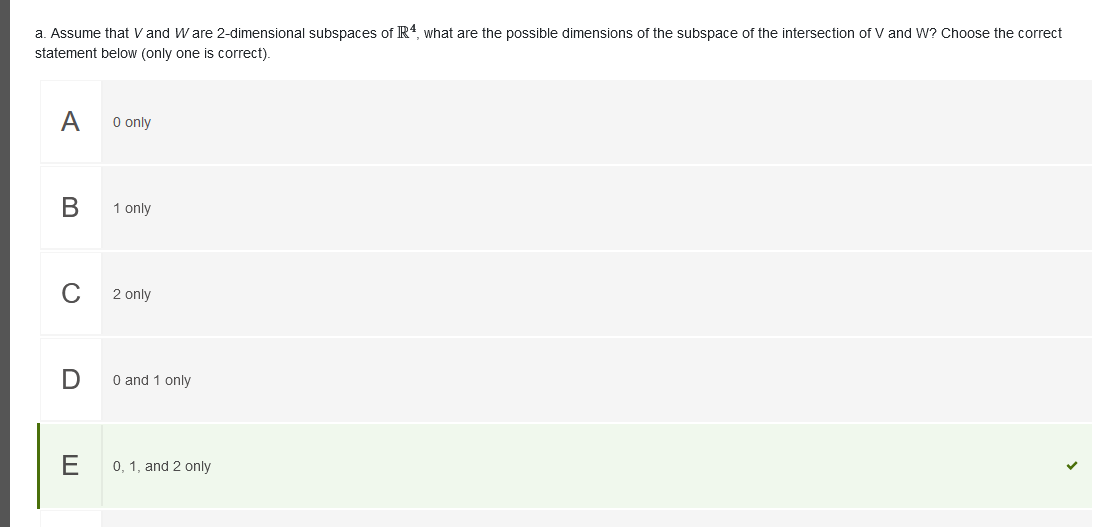

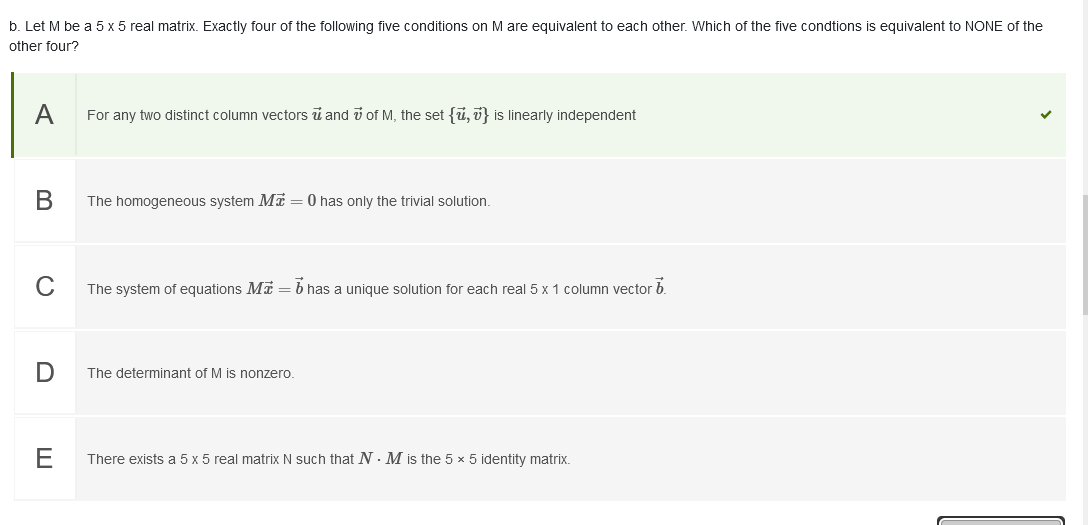

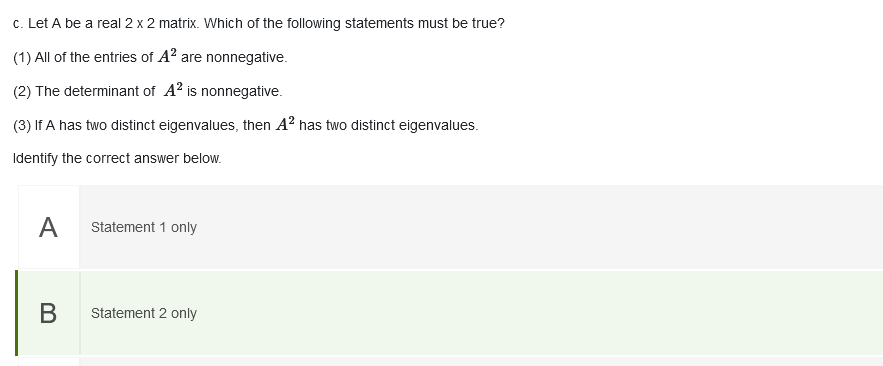